In [1]:
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ------------ --------------------------- 30.7/102.3 kB ? eta -:--:--
     ---------------------- -------------- 61.4/102.3 kB 825.8 kB/s eta 0:00:01
     ---------------------- -------------- 61.4/102.3 kB 825.8 kB/s eta 0:00:01
     ------------------------------------ 102.3/102.3 kB 535.1 kB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [4]:
    import requests
    import io
    import pandas as pd
    
    URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv'
    resp = requests.get(URL)
    text = io.StringIO(resp.text)
    
    df = pd.read_csv(text)
    print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [7]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [8]:
df.isna().sum()

Date                       0
Year                       0
Month                      0
Recession                  0
Consumer_Confidence        0
Seasonality_Weight         0
Price                      0
Advertising_Expenditure    0
Competition                0
GDP                        0
Growth_Rate                0
unemployment_rate          0
Automobile_Sales           0
Vehicle_Type               0
City                       0
dtype: int64

In [9]:
df.shape

(528, 15)

In [56]:
years = df['Year'].unique()

In [57]:
years

array([1980, 1981, 1982, 1983, 1990, 1991, 1992, 2000, 2001, 2002, 2008,
       2009, 2020, 1984, 1985, 1986, 1987, 1988, 1989, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2003, 2004, 2005, 2006, 2007, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023],
      dtype=int64)

In [49]:
years = pd.Series(years)

In [33]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [58]:
auto_avg = df.groupby(['Year'])['Automobile_Sales'].mean()

In [59]:
new = pd.DataFrame({'year': years, 'values': auto_avg})

In [60]:
new.head()

,year,values
Year,,
1980,1980,678.950000
1981,1981,633.408333
1982,1982,631.150000
1983,1983,2889.350000
1984,1990,2972.250000


# Part 1

# 1.1

Text(0, 0.5, 'Sales')

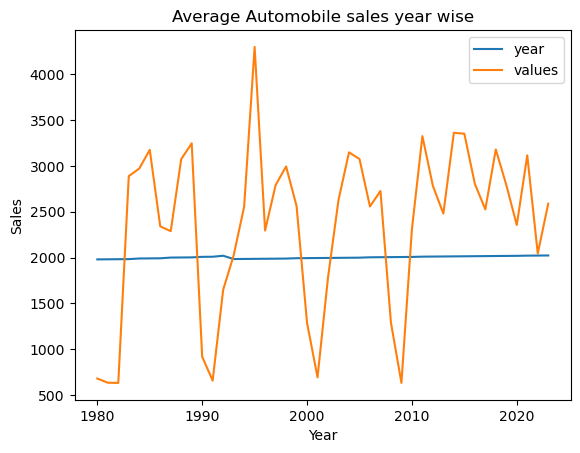

In [64]:
new.plot(kind = 'line')
plt.title("Average Automobile sales year wise")
plt.xlabel('Year')
plt.ylabel('Sales')

<Figure size 1200x600 with 0 Axes>

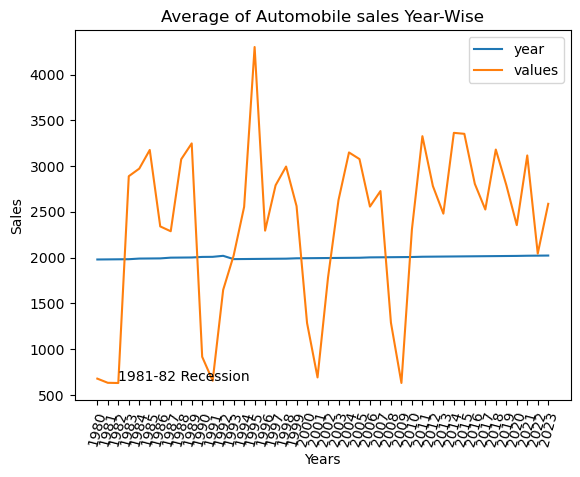

In [67]:
plt.figure(figsize=(12, 6))
df_line = new
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Average of Automobile sales Year-Wise')
plt.text(1982, 650, '1981-82 Recession')
plt.legend()
plt.show()

In [68]:
df['Vehicle_Type'].value_counts()

Mediumfamilycar    166
Smallfamiliycar    122
Sports              94
Supperminicar       76
Executivecar        70
Name: Vehicle_Type, dtype: int64

# 1.2

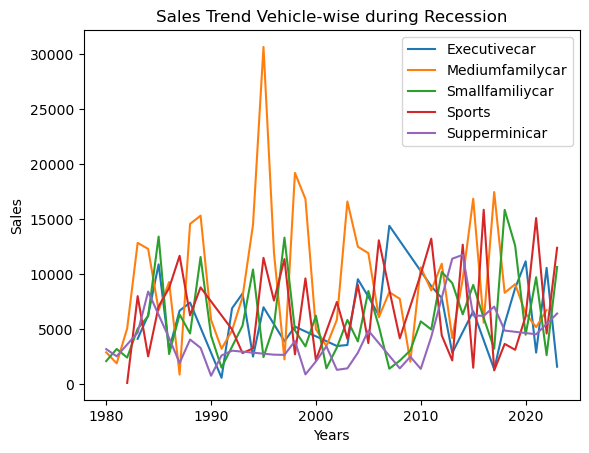

In [70]:
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

# 1.3

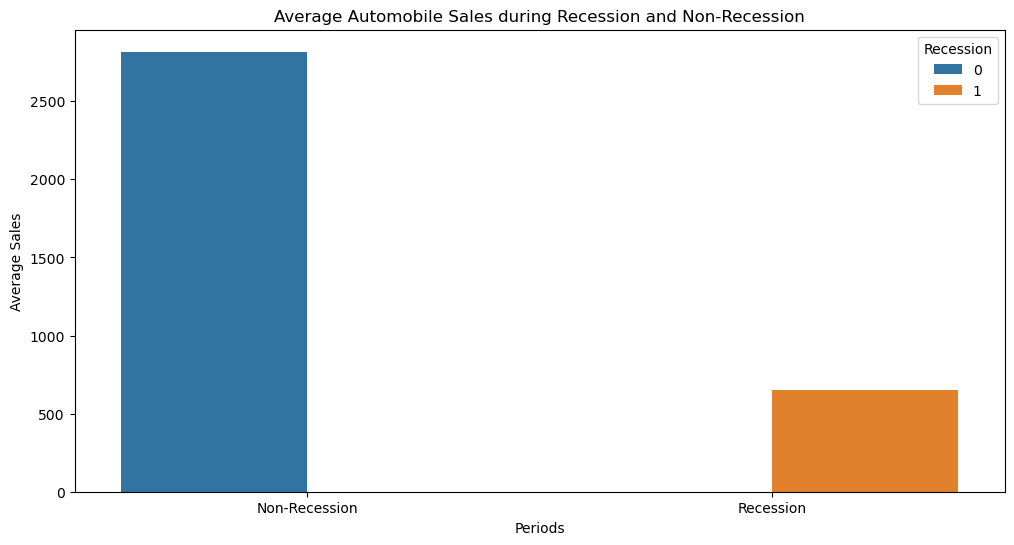

In [75]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
   
plt.figure(figsize=(12, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Periods')
plt.ylabel('Average Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

In [80]:
df['Recession_Period'] = df['Recession'] == 1
df['Non_Recession_Period'] = df['Recession'] == 0
df['Recession_Period'] = 1
df['Non_Recession_Period'] = 0


In [81]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City,Recession_Period,Non_Recession_Period
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia,1,0
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York,1,0
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York,1,0
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois,1,0
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California,1,0


In [90]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

In [91]:
rec_data

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City,Recession_Period,Non_Recession_Period
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia,1,0
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York,1,0
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York,1,0
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois,1,0
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,12/31/2009,2009,Dec,1,94.83,0.25,20863.845,1832,8,37.003,-0.459719,5.0,594.5,Smallfamiliycar,Illinois,1,0
109,9/30/2020,2020,Sep,1,111.62,0.07,33435.708,2622,8,17.046,-1.170773,3.7,692.8,Mediumfamilycar,Illinois,1,0
110,10/31/2020,2020,Oct,1,84.48,0.00,29408.199,4700,4,53.028,0.678547,3.6,214.0,Sports,California,1,0
111,11/30/2020,2020,Nov,1,112.39,0.07,24960.137,4945,8,24.367,-1.176222,4.2,597.1,Mediumfamilycar,New York,1,0


# 1.4

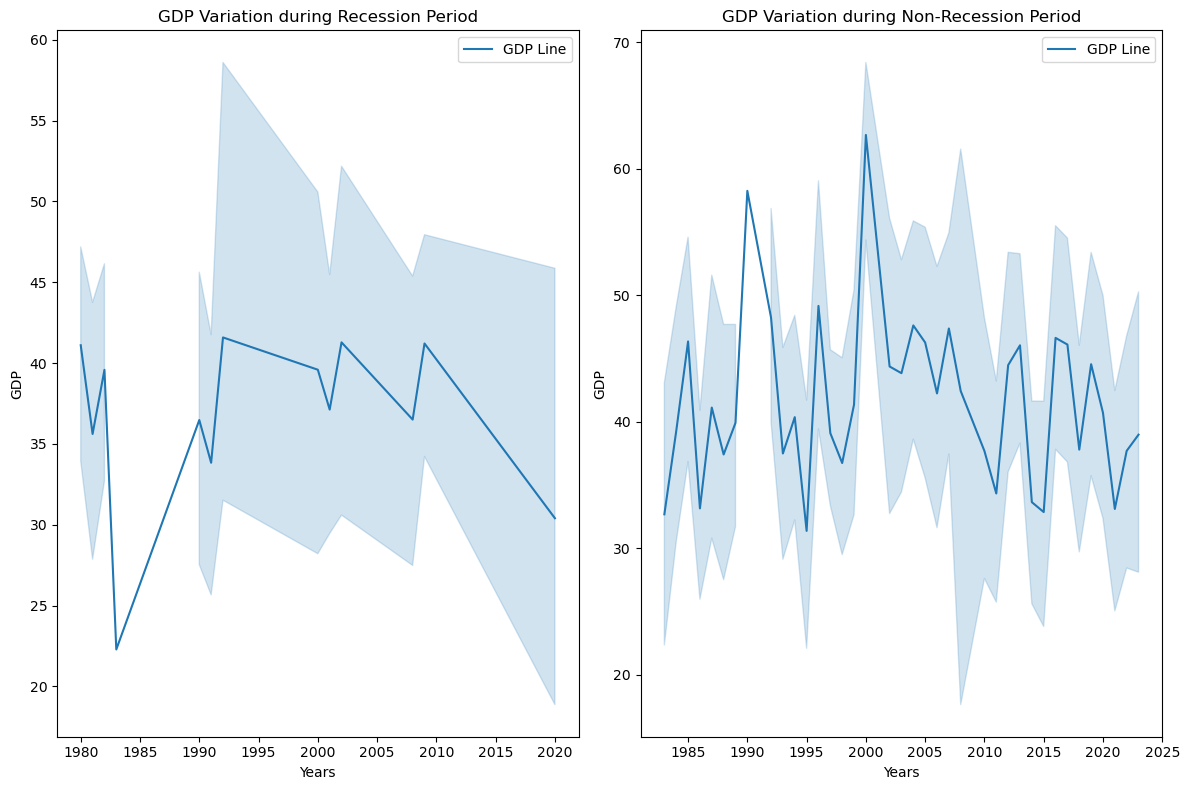

In [89]:
plt.figure(figsize=(12, 8))
    
#subplot 1
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data= rec_data, label='GDP Line')
plt.title('GDP Variation during Recession Period')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.legend()
#subplot 1
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data= non_rec_data, label='GDP Line')
plt.title('GDP Variation during Non-Recession Period')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.legend()
    
plt.tight_layout()
plt.show()

# 1.5

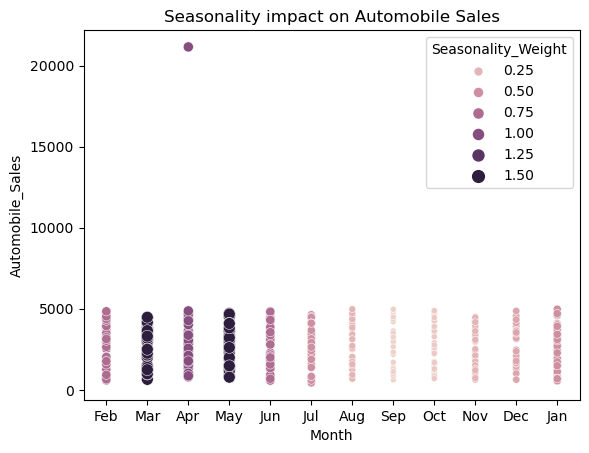

In [95]:
size=non_rec_data['Seasonality_Weight'] #for bubble effect    
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight')
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.show()

# 1.6

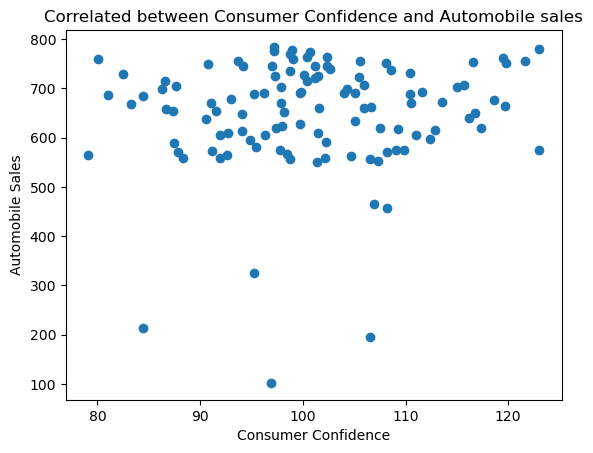

In [98]:
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Correlated between Consumer Confidence and Automobile sales')
plt.show()

# 1.7

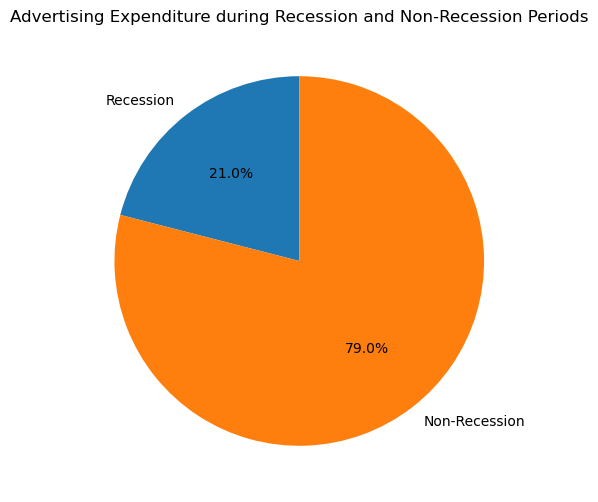

In [100]:
RAtotal = rec_data['Advertising_Expenditure'].sum()
NRAtotal = non_rec_data['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

# 1.8

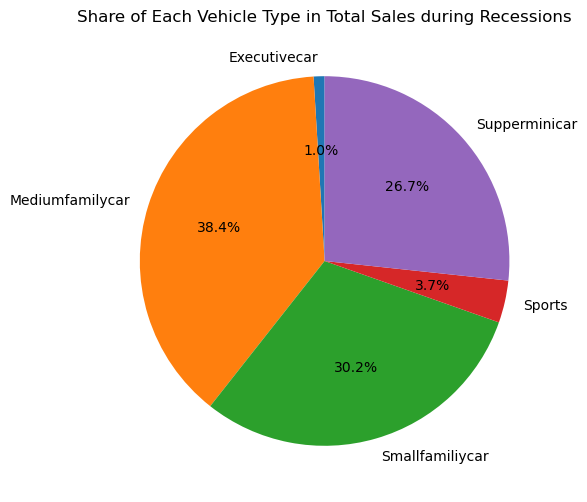

In [101]:
VTsales = rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
# Create a pie chart for the share of each vehicle type in total sales during recessions
plt.figure(figsize=(8, 6))
labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Share of Each Vehicle Type in Total Sales during Recessions')
plt.show()

# 1.9

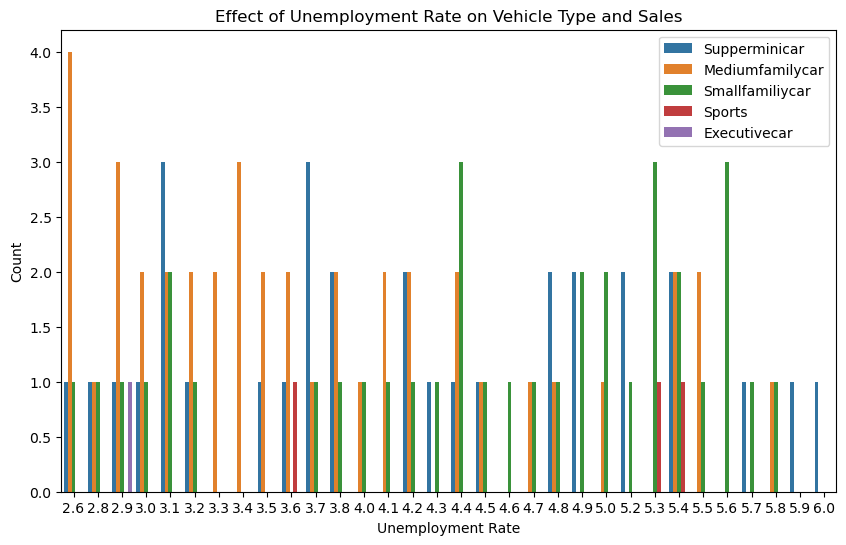

In [102]:
plt.figure(figsize=(10, 6))
sns.countplot(data=rec_data, x='unemployment_rate', hue='Vehicle_Type')  
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')
plt.show()

# Part 2